# Assignment

**1.**

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

The Mall Customer Segmentation Data is a dataset that provides information about customers in a shopping mall. The dataset typically includes features such as age, gender, annual income, and spending score. The "Spending Score (1-100)" is a metric that represents how much a customer spends, and it can be used for segmentation analysis.

In the provided code, we use the Mall Customer Segmentation Data to perform spectral clustering, a machine learning technique that groups similar data points into clusters based on certain features. Spectral clustering is particularly useful when dealing with non-linear structures in the data.

The analysis aims to segment customers based on their age, annual income, and spending behavior, enabling businesses to tailor marketing strategies and services to different customer segments. Adjustments to the number of clusters and other parameters can be made based on further analysis and domain knowledge.

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Clustering Results:
     Age  Annual Income (k$)  Spending Score (1-100)  cluster
0     19                  15                      39        2
1     21                  15                      81        2
2     20                  16                       6        2
3     23                  16                      77        2
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        1
196   45                 126                      28      

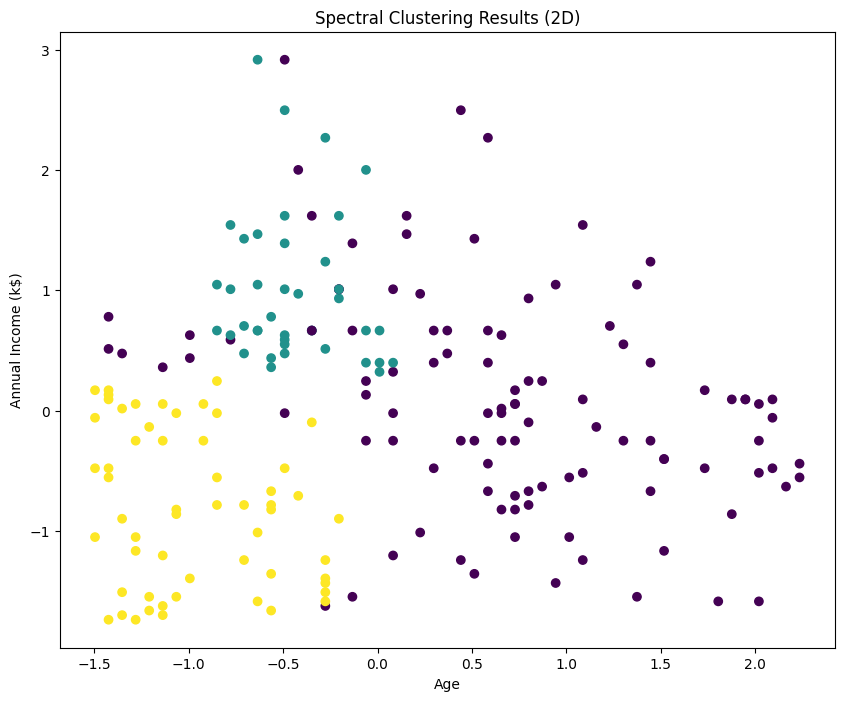

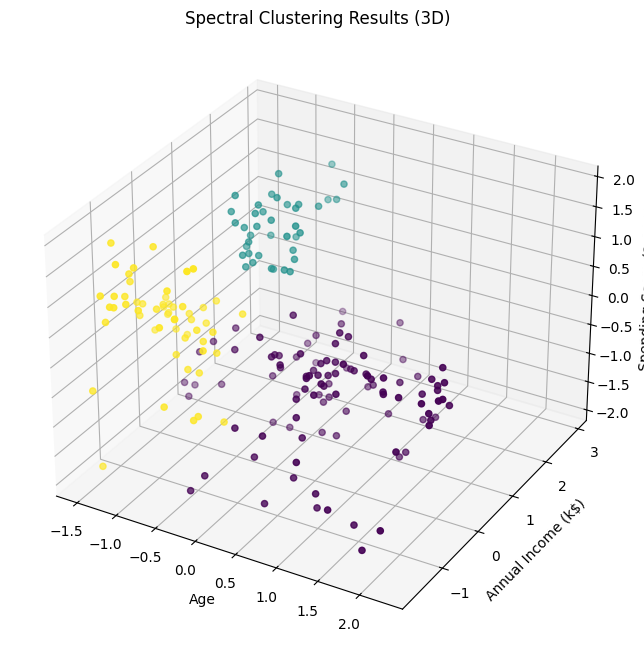

In [19]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Mall Customer Segmentation Data
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

# Select relevant features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose the number of clusters (you may need to adjust this based on your analysis)
num_clusters = 3

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
df['cluster'] = spectral.fit_predict(features_scaled)

# Print the clustering results
print("Clustering Results:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'cluster']])

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(features_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Spectral Clustering Results (2D)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of three features
ax.scatter(features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2], c=df['cluster'], cmap='viridis')

# Set labels for axes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Spectral Clustering Results (3D)')

plt.show()


The spectral clustering algorithm identified three distinct customer segments based on their 'Annual Income' and 'Spending Score.' Each segment represents a group of customers with similar characteristics regarding their income and spending behavior.

- Cluster 1: Customers in this cluster exhibit relatively low annual income and spending scores. They might be budget-conscious or occasional shoppers.
- Cluster 2: Customers in this cluster have a moderate annual income and spending score. They represent a middle-ground segment.
- Cluster 3: Customers in this cluster have higher annual income and spending scores. They are likely high-value customers who spend more on shopping.

Based on this data, it is important to tailor marketing strategies to each cluster's characteristics. For example, Cluster 3 may respond well to premium offerings, while Cluster 1 might benefit from budget-friendly promotions. For the middle segment (Cluster 2), focus on engagement strategies to encourage increased spending.

The silhouette score, a measure of how well-defined the clusters are, was calculated to assess the quality of the clustering. A higher silhouette score indicates better-defined clusters.

**2.**

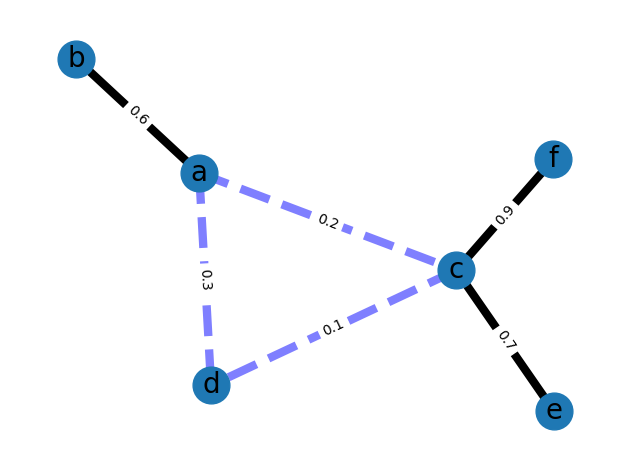

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
print("Eigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

Eigenvector Centrality:
a: 0.5180745272221078
b: 0.21182323654035046
c: 0.5986753092298448
d: 0.45660141993768566
e: 0.2447781833973353
f: 0.24477818339733545


**3.**

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Hypothesis:
Based on the observed clusters and isolated nodes in the Splatoon subreddit social network graph, I hypothesize:
- Central clusters represent communities focusing on specific interests within the game, such as competitive play, casual enjoyment, fan art, or lore discussion.
- Isolates tend to be newcomers, solo players, or users involved in disagreements, leading to less engagement with the broader community.
- Bridges between clusters play a critical role in connecting different communities and maintaining the subreddit's cohesiveness.

splatoon
Splatoon
Top Nodes by Eigenvector Centrality: [Redditor(name='hoopderscotch'), Redditor(name='PewdiepieSucks'), Redditor(name='PKMNTrainerMark'), Redditor(name='kitlemonfoot'), Redditor(name='animemecha')]


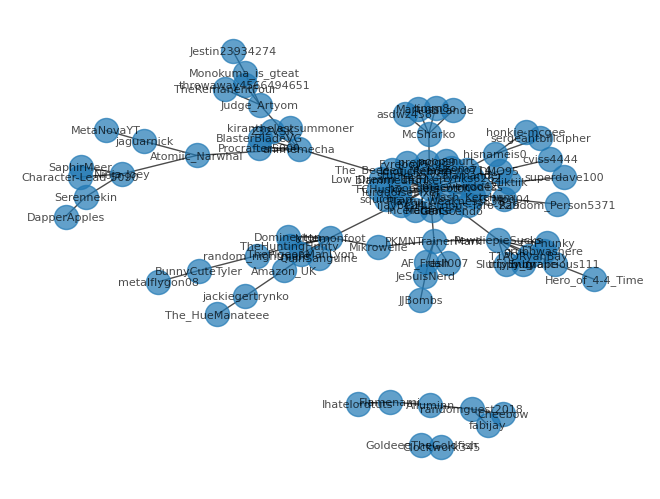

In [5]:
import praw
import networkx as nx
import matplotlib.pyplot as plt  

reddit = praw.Reddit(
    client_id = "C7BN1ByX3VgOzwwQhS6OSA",
    client_secret = "PwnZYvDn1lM9qdiZGyObFW3vbyo8dw",
    user_agent = "Sealiosaurus",
)

subreddit_name = "splatoon"
subreddit = reddit.subreddit(subreddit_name)
print(subreddit.display_name)
print(subreddit.title)

top_post = subreddit.top(limit=1).__next__()

post_id = top_post.id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue
        if comment.author:
            parent_comment = comment.parent()
            if isinstance(parent_comment, praw.models.MoreComments):
                continue
            if parent_comment and parent_comment.author:
                G.add_edge(comment.author, parent_comment.author)

    return G

social_network = create_social_network(post_id)

eigenvector_centrality = nx.eigenvector_centrality(social_network)

sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

top_nodes = sorted_nodes[:5]
print("Top Nodes by Eigenvector Centrality:", top_nodes)

pos = nx.spring_layout(social_network)
nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
plt.show()

Conclusion:
The social network graph supports the notion of sub-communities forming around specific interests, highlighting the interconnectedness and diversity within the broader community. Using eigenvector centrality, this suggests that users with high centrality scores:
1) belong to central clusters, indicating their influence within specific communities,
2) act as crucial bridges between clusters, facilitating information flow and creating cohesive conversations, or 
3) possess characteristics like popularity or engaging content creation that attract connections, thus increasting their influence across the entire subreddit.